In [3]:
import numpy as np #导入NumPy库，简称np
# 用于科学计算，主要提供多维数组

import pandas as pd #导入pandas库，简称pd
# 主要用于数据处理，提供DataFrame等表格数据结构，Excel，CSV等数据

import matplotlib.pyplot as plt #导入matplotlib.pyplot库，简称plt
# 是最基础的数据可视化库，提供了类似Matlab的绘图接口，可以绘制折线图，散点图等


# Introduction : Présentation de l'exercice
## 学习如何加载，可视化，归一化数据，并且手动实现KNN算法
Dans cet exercice, vous allez explorer les données IRIS, un dataset classique utilisé en apprentissage automatique.  Vous apprendrez à charger, visualiser, normaliser les données et à implémenter votre propre algorithme des K plus proches voisins (KNN) sous forme de classe. Vous serez également guidés pour évaluer la performance de votre modèle et interpréter les résultats.
Les objectifs principaux sont :
1. Comprendre les étapes de prétraitement des données.
2. Apprendre à visualiser les données en utilisant Matplotlib.
3. Implémenter un modèle KNN simple sans utiliser de bibliothèques externes.
4. Évaluer la performance de votre modèle en utilisant des métriques comme la précision.

# Étape 1 : Chargement du dataset IRIS
1. Importez le module `load_iris` depuis `sklearn.datasets`.
2. Chargez le dataset IRIS en appelant la fonction `load_iris()` et stockez-le dans une variable (par exemple, `iris`).
3. Extraire les données des caractéristiques (features) sous forme de DataFrame pandas et les stocker dans une variable `X`. Les colonnes du DataFrame doivent correspondre aux noms des caractéristiques disponibles dans `iris['feature_names']`.
4. Extraire les cibles (targets) sous forme de Série pandas et les stocker dans une variable `y`. Assurez-vous que la Série a un nom explicite, par exemple, "target".
5. Affichez un aperçu des données de `X` et `y` en utilisant les méthodes `.head()`.

In [4]:
# Pandans DataFrame 标准封装是
# import pandas as pd
# df = pd.DataFrame(data, columns=column_names)
# data 必须是二维数组（如 NumPy 数组、列表列表、字典等）。
# columns 必须是列名列表，长度与 data 列数相同。

In [9]:
# skearn.datasets是Scikit-learn库中的一个数据集模块，用于加载内部和外部的数据集
from sklearn.datasets import load_iris
# iris是一个库里面已经有的datasets
iris = load_iris() #加载iris库，并赋值给iris，以方便后续调用

# 使用Pandas进行封装，变成一张表
# features_name 就是指调用是iris每个features的名字
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Series 是pandas中的一种结构，每个数据都有一个index，支持不同数据类型
# 就是把原数据转换成，0 - 数据1， 1- 数据2的形式
y = pd.Series(iris.target,name = "target")

print('Head Features:')
print(X.head())

print('Target:')
print(y.head())

Head Features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Target:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


# Étape 2 : Préparation des données
## 归一化数据处理，使得数据归化到[0,1]之间
Instructions pour les étudiants :
1. Normalisez les données des caractéristiques pour que leurs valeurs soient comprises entre 0 et 1.
2. Suivez les étapes suivantes pour normaliser :
    - Calculez la valeur minimale de chaque caractéristique en utilisant `X.min()`.
    - Calculez la valeur maximale de chaque caractéristique en utilisant `X.max()`.
    - Appliquez la formule de normalisation pour chaque caractéristique :
    normalized_value = (value - min) / (max - min)
    - Remplacez les valeurs de `X` par leurs valeurs normalisées.
3. Une fois la normalisation terminée, affichez un aperçu des données normalisées de `X` en utilisant `.head()`.

In [20]:
# 归一化步骤：
# 计算每列最小值和最大值
X_min = X.min()
X_max = X.max()

Utiliser de la fonction

In [21]:
# 归一化公式：(X - X_min) / (X_max - X_min)
X = (X -X_min) / (X_max - X_min)

print('After normalisation:')
print(X.head())

After normalisation:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


# Étape 3 : Visualisation des données avec Matplotlib
## 使用Matplotlib可视化数据
Vous allez utiliser Matplotlib pour visualiser la distribution des données. Suivez les étapes ci-dessous :
1. Créez une nouvelle fonction appelée `plot_scatter` qui accepte les paramètres suivants :
    - X : les données d'entrée (features).
    - y : les cibles (targets).
    - feature_x : l'indice de la première caractéristique à tracer.
    - feature_y : l'indice de la seconde caractéristique à tracer.
    - feature_names : la liste des noms des caractéristiques.
    - target_names : la liste des noms des classes cibles.
    - colors : une liste de couleurs correspondant à chaque classe cible.
    - title : le titre du graphique.
2. Utilisez plt.figure pour définir la taille du graphique.
3. Parcourez chaque classe cible (0, 1, 2) et :
    - Sélectionnez les lignes de X où y correspond à la classe actuelle.
    - Tracez un nuage de points (scatter) pour les deux caractéristiques sélectionnées, en utilisant une couleur spécifique pour chaque classe.
4. Ajoutez des étiquettes pour les axes x et y en utilisant plt.xlabel et plt.ylabel.
5. Ajoutez un titre avec plt.title et une légende avec plt.legend.
6. Affichez le graphique en utilisant plt.show.

In [39]:
# 定义一个函数 plot_scatter()，用于绘制两个特征之间的散点图

# 设置颜色
colors = ["red", "blue", "green"]

# 再写一次，方便调用，修正nom class etc放在这里了
# 使其成为一个全局变量，不需要在每个函数中重新定义
feature_names = iris.feature_names
target_names = iris.target_names

def plot_scatter(X,y,feature_x,feature_y,feature_names,target_names,colors,title):
  # 设定图像大小
  plt.figure(figsize=(4,3))
  # 筛选出属于当前类别的点
  # for i, target_name in enumerate(target_names):
  # enumerate是 Python 内置函数，它用于在遍历可迭代对象（如列表、元组、字符串）时，同时获取索引和值
  # 等价于以下for循环

  for i in range(len(target_names)):
    targe_names = target_names[i]
    # 从X中筛选 y 中等于 i 的行，即选出类别为i的数据
    SelectXY = X[y==i]

    # 调用plt中的scattet，绘制散点图

    plt.scatter(  # illoc是索引位置，df.iloc[行索引, 列索引]
            # 冒号 ; 选择所有行列
            SelectXY.iloc[:, feature_x],   # 选取 feature_x 作为 X 轴
            SelectXY.iloc[:, feature_y],   # 选取 feature_y 作为 Y 轴

            color=colors[i],        # 使用不同颜色
            label=target_names[i],     # 设置类别名称
            edgecolors='black',       # 添加黑色边框
            alpha=0.7            # 设置透明度
        )

    #   设置坐标轴标签
    # xlabel 是 Matplotlib 提供的一个 方法，用于设置 X 轴的标签（名称）
    # feature_names[feature_x] → 选取 第 feature_x 个特征的名称，作为 X 轴的标签
    plt.xlabel(feature_names[feature_x])
    plt.ylabel(feature_names[feature_y])

    #  设置标题和图例
    plt.title(title)
    plt.legend()

# 显示图像，一定要放在for循环外，要不然每for一次，生成一张图
  plt.show()

Visualisation de "sepal length (cm)" vs "sepal width (cm)"

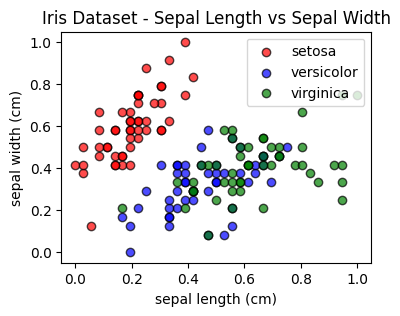

In [40]:
plot_scatter(
    X=X,
    y=y,
    feature_x=0,  # "sepal length (cm)"
    feature_y=1,  # "sepal width (cm)"
    feature_names=feature_names,
    target_names=target_names,
    colors=colors,
    title="Iris Dataset - Sepal Length vs Sepal Width"
)

Visualisation de "petal length (cm)" vs "petal width (cm)"

Visualisation croisée de "sepal length (cm)" vs "petal length (cm)"

Visualisation croisée de "sepal width (cm)" vs "petal width (cm)"

# Étape 4 : Visualisation des histogrammes par caractéristique et par classe
Vous allez implémenter une fonction appelée `plot_histograms_by_target` qui affiche un histogramme de la distribution des valeurs pour chaque caractéristique, groupées par classe cible. Suivez les étapes ci-dessous :
1. Créez une fonction nommée plot_histograms_by_target acceptant les arguments suivants :
    - X : un DataFrame contenant les caractéristiques.
    - y : une Série ou un tableau contenant les cibles.
    - feature_names : une liste des noms des caractéristiques.
    - target_names : une liste des noms des classes cibles.
    - colors : une liste des couleurs associées à chaque classe.
2. Dans la fonction, pour chaque caractéristique (parcourue à l'aide de feature_names) :
    - Créez une figure avec plt.figure.
    - Parcourez chaque classe cible et :
      - Sélectionnez les lignes de X correspondant à cette classe.
      - Tracez un histogramme pour la caractéristique courante avec plt.hist, en utilisant une couleur spécifique.
    - Ajoutez des étiquettes pour les axes, un titre pour l'histogramme, et une légende pour indiquer les classes.
3. Appelez cette fonction avec les données fournies pour générer les histogrammes.

Apeller de la fonction pour tracer les histogrammes

# Étape 5 : Implémentation de l'algorithme des KNN sous forme de classe
Implémentez une classe `KNNClassifier` qui inclut les méthodes suivantes :
- __init__(self, k) : pour initialiser le nombre de voisins k.
- fit(self, X_train, y_train) : pour stocker les données d'entraînement.
- predict(self, X_test) : pour prédire les classes des données test en suivant ces étapes :
   1. Pour chaque point de test, calculer la distance à chaque point d'entraînement.
      Cette distance doit être calculée à l'aide d'une méthode privée comme suit :
      distance = sqrt((x1 - x2)^2 + (y1 - y2)^2 + ...).
   2. Identifier les k voisins les plus proches en triant les distances.
   3. Déterminer la classe majoritaire parmi les k voisins et l'assigner au point de test.

# Étape 6 : Utilisation du modèle
1. Initialiser du classificateur avec k=3
2. En utilisant la fonction `train_test_split` qui se trouve dans la bibliothèque `sklearn.model_selection`, séparer le dataset X & y en un dataset d'entrainement `X_train` & `y_train` et un dataset de test `X_test` & `y_test`.
3. Entrainer le modèle avec les données d'entrainement
4. Effectuer les prédictions sur les données de test.
5. Afficher les prédictions réalisées avec la vérité terrain

# Étape 7 : Evaluation du modèle
Implémentez une fonction `calculate_accuracy` qui calcule la précision d'un modèle.
 - La fonction prend deux arguments :
   1. y_true : les vraies classes sous forme de liste ou tableau.
   2. y_pred : les classes prédites sous forme de liste ou tableau.
 - La fonction retourne un nombre entre 0 et 1 représentant la proportion des prédictions correctes.
 - Étapes à suivre :
   1. Initialiser un compteur à 0 pour les prédictions correctes.
   2. Parcourir les deux listes en parallèle (y_true et y_pred).
   3. Incrémenter le compteur à chaque fois que les deux valeurs correspondantes sont égales.
   4. Diviser le compteur par la longueur de y_true pour obtenir la précision.

Afficher la précision du modèle sur l'ensemble de test

# Pour les plus rapides (à faire à la maison)
1. Modifier le notebook (après l'avoir dupliqué!) pour explorer le dataset wine (load_wine dans sklearn.dataset).
2. Créer une classe `KNNRegressor`, en vous appuyant sur le code que vous avez précédemment réalisé. Un régresseur permet de trouver un valeur numérique (entier ou réel) à la place d'une classe. Instructions
    - le mécanisme de recherche des k plus proche voisin est le même
    - à la place de faire un vote à la majorité, on calcule et retourne la moyenne des k points les plus proches de la donnée à prédire
    - tester sur le dataset diabetes (toujours dans sklearn.dataset)
    - l'évaluation se fait en calculant la moyenne des erreurs absolues entre la prédiction et la vérité terrain